In [34]:
import numpy as np
import pandas as pd
import os
import specutils
import matplotlib.pyplot as plt
import astropy
import astropy.units as units
import astropy.utils as utils
import astropy.io as io

import FunctionLib as F

In [2]:
DJA_Catalog_DataFrame=pd.read_csv('./DJACatalog.csv')

DJA_File_Path=os.path.expanduser('~/DJAData/')
if os.path.exists(DJA_File_Path):
    DJA_File_List=np.array(os.listdir(DJA_File_Path))
print('Number of files in DJA directory:', len(DJA_File_List))


Number of files in DJA directory: 18506


In [3]:
DJA_File_List=[f for f in os.listdir('./') if f.startswith('goodsn')]
print('Number of files in current directory:', len(DJA_File_List))

Number of files in current directory: 3


In [4]:
redshift=F.Load_Redshift(DJA_Catalog_DataFrame, DJA_File_List[1])
print('Redshift:', redshift)

Redshift: 4.7275


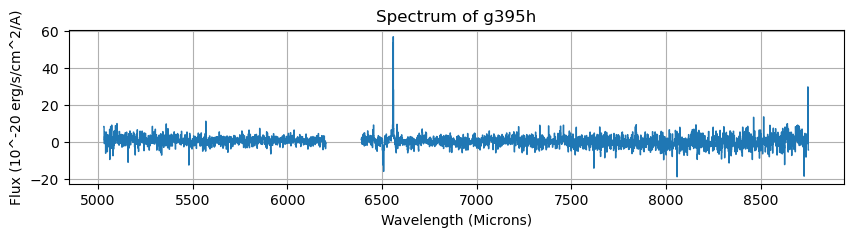

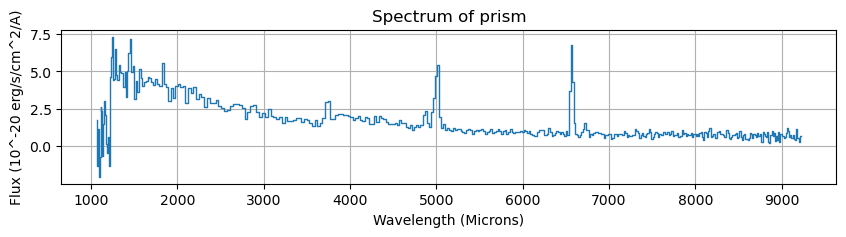

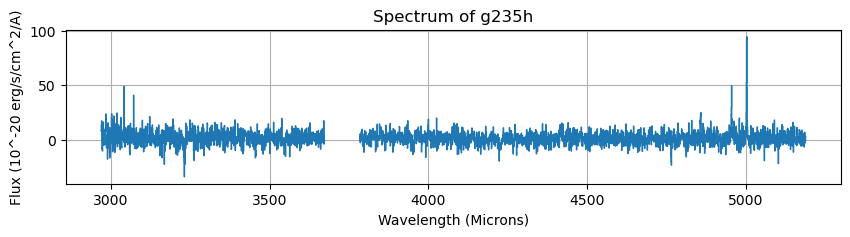

In [5]:
for File_Name in DJA_File_List:
    if File_Name.endswith('.fits'):
        grating=File_Name.split('_')[1].split('-')[0]
        spectrum=F.Load_N_Rescale_Spectra(File_Name)
        spectrum=F.Calibrate_Spectra_To_RestFrame(spectrum, redshift)
        plt.figure(figsize=(10, 2))
        plt.plot(spectrum.wavelength.value, spectrum.flux.value*1e20,drawstyle='steps-mid',linewidth=1)
        plt.xlabel('Wavelength (Microns)')
        plt.ylabel('Flux (10^-20 erg/s/cm^2/A)')
        plt.grid()

        plt.title('Spectrum of ' + grating)

In [ ]:
def Extract_Emission_Line(SpecUtilsSpectrum1D, Line_Wavelength, Detect_Window_Width=1000*units.angstrom):
    """
    This function searches for a given emission line with the given wavelength and the width of the detection window from the given spectrum.

    Parameters
    ----------
    SpecUtilsSpectrum1D : specutils.Spectrum1D
        The spectrum from which to extract the emission line.
    Line_Wavelength : astropy.units.Quantity
        The wavelength of the emission line to extract.
    Detect_Window_Width : astropy.units.Quantity
        The width of the detection window around the line wavelength. Default is 1000 Angstroms.
    """

    Line_Wavelength=Line_Wavelength.to(SpecUtilsSpectrum1D.spectral_axis.unit)
    Line_Wavelength=Line_Wavelength.value

    Detect_Window_Width=Detect_Window_Width.to(SpecUtilsSpectrum1D.spectral_axis.unit)
    Detect_Window_Width=Detect_Window_Width.value

    specutils.analysis.

In [6]:
test=specutils.Spectrum1D.read(DJA_File_List[1])

Set DATE-AVG to '2023-03-25T07:01:51.341' from MJD-AVG'. [astropy.wcs.wcs]
Set OBSGEO-B to    15.748086 from OBSGEO-[XYZ].
Set OBSGEO-H to 1230675540.403 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [9]:
with astropy.io.fits.open(DJA_File_List[1]) as hdul:
    err=hdul[1].data['err']
    flux=hdul[1].data['flux']
    wavelength=hdul[1].data['wave']

In [40]:
err

array([inf, inf, inf, ..., inf, inf, inf], dtype='>f8')

In [45]:
wavelength

array([2.83      , 2.83063429, 2.83126857, ..., 5.23838286, 5.23901714,
       5.23965143], dtype='>f8')

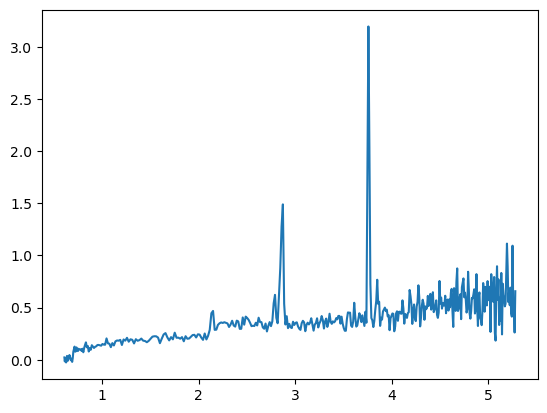

In [11]:
plt.plot(wavelength, flux)

In [22]:
spectra1d.uncertainty.array

array([inf, inf, inf, ..., inf, inf, inf])

In [27]:
spectra1d.flux


<Quantity [nan, nan, nan, ..., nan, nan, nan] uJy>

Set DATE-AVG to '2023-03-25T08:25:08.144' from MJD-AVG'. [astropy.wcs.wcs]
Set OBSGEO-B to    15.712512 from OBSGEO-[XYZ].
Set OBSGEO-H to 1230531932.268 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


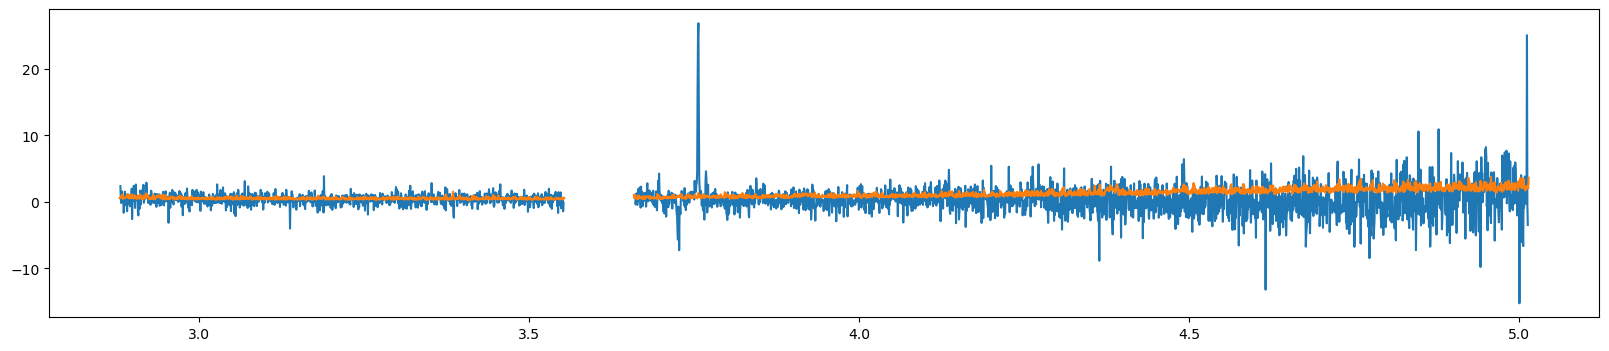

In [32]:
spectra1d=specutils.Spectrum1D.read(DJA_File_List[0])
plt.figure(figsize=(20, 4))
plt.plot(spectra1d.spectral_axis.value, spectra1d.flux)
#plot the errors
plt.plot(spectra1d.spectral_axis.value, (spectra1d.uncertainty.array))

Set DATE-AVG to '2023-03-25T07:49:25.866' from MJD-AVG'. [astropy.wcs.wcs]
Set OBSGEO-B to    15.727782 from OBSGEO-[XYZ].
Set OBSGEO-H to 1230593226.166 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


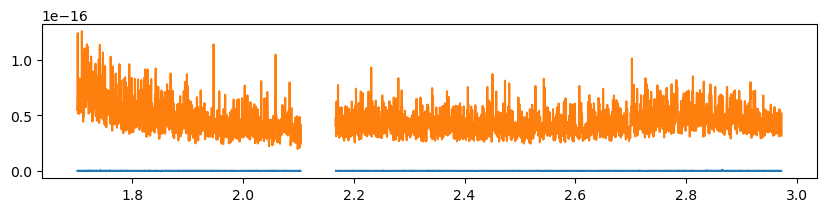

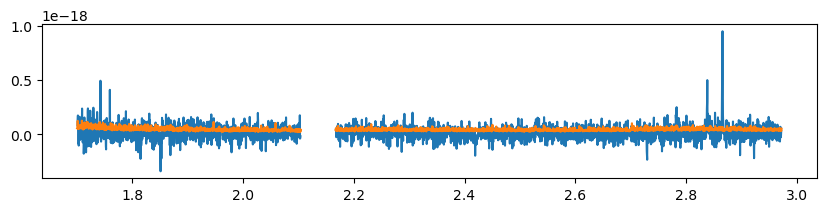

In [33]:
spectra1d=specutils.Spectrum1D.read(DJA_File_List[2])
plt.figure(figsize=(10, 2))
plt.plot(spectra1d.spectral_axis.value, spectra1d.flux.to(units.erg / (units.cm**2 * units.s * units.AA), equivalencies=units.spectral_density(spectra1d.spectral_axis)))
#plot the errors
plt.plot(spectra1d.spectral_axis.value, (spectra1d.uncertainty.array*units.mJy).to(units.erg / (units.cm**2 * units.s * units.AA), equivalencies=units.spectral_density(spectra1d.spectral_axis)))
plt.show()

#plot the errors
plt.figure(figsize=(10, 2))
plt.plot(spectra1d.spectral_axis.value, spectra1d.flux.to(units.erg / (units.cm**2 * units.s * units.AA), equivalencies=units.spectral_density(spectra1d.spectral_axis)))
#plot the errors
plt.plot(spectra1d.spectral_axis.value, (spectra1d.uncertainty.array*units.uJy).to(units.erg / (units.cm**2 * units.s * units.AA), equivalencies=units.spectral_density(spectra1d.spectral_axis)))
plt.show()

In [71]:
a=astropy.nddata.NDData( (spectra1d.uncertainty.array*units.uJy).to(units.erg / (units.cm**2 * units.s * units.AA), equivalencies=units.spectral_density(spectra1d.spectral_axis)))
spec=specutils.Spectrum1D(flux=spectra1d.flux, spectral_axis=spectra1d.spectral_axis, uncertainty=a.data)

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


In [77]:
astropy.nddata.StdDevUncertainty(a)

StdDevUncertainty([inf inf inf ... inf inf inf] erg / (Angstrom s cm2))

In [104]:
err=(spectra1d.uncertainty.array*units.uJy).to(units.erg / (units.cm**2 * units.s * units.AA), equivalencies=units.spectral_density(spectra1d.spectral_axis))

In [107]:
uncertainty = astropy.nddata.StdDevUncertainty(err)

# Create the spectrum with the properly typed uncertainty
spec = specutils.Spectrum1D(
    flux=spectra1d.flux.to(units.erg / (units.cm**2 * units.s * units.AA), equivalencies=units.spectral_density(spectra1d.spectral_axis)),
    spectral_axis=spectra1d.spectral_axis,
    uncertainty=uncertainty
)

In [ ]:
def Load_N_Rescale_Spectra(Fits_FilePath):
    """
    Load the spectra from the FITS file and pack the spectra into a SpecUtils Spectrum1D object with the F_lambda.

    Parameters
    ----------
    Fits_FilePath : str
        The path to the FITS file containing the spectra.

    Returns
    -------
    specutils.Spectrum1D
        The Spectrum1D object containing the spectra, with the flux in F_lambda units.

    Errors
    -------
    Returns the error message if the FITS file cannot be opened or if there is an issue with the data.
    """
    with io.fits.open(Fits_FilePath) as hdul:

      try:
        Spectra_Data = hdul[1].data
        Spectra_Header = hdul[1].header

        Wavelength = Spectra_Data['wave']*units.micron
        Flux = Spectra_Data['flux']*units.uJy
        Error= Spectra_Data['err']*units.uJy

        Flux_Lambda = Flux.to(units.erg / (units.cm**2 * units.s * units.AA), equivalencies=units.spectral_density(Wavelength))
        Error_Lambda = Error.to(units.erg / (units.cm**2 * units.s * units.AA), equivalencies=units.spectral_density(Wavelength))
        Error_Lambda = astropy.nddata.StdDevUncertainty(Error_Lambda)


        return specutils.Spectrum1D(flux=Flux_Lambda, spectral_axis=Wavelength, meta=Spectra_Header, uncertainty=Error_Lambda)

      except Exception as e:
        return e

In [114]:
a=Load_N_Rescale_Spectra(DJA_File_List[2])

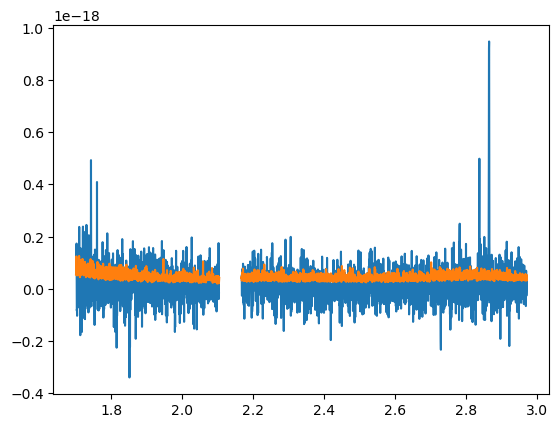

In [115]:
plt.plot(a.spectral_axis.value, a.flux.value)
plt.plot(a.spectral_axis.value, a.uncertainty.array)